## MLOps
MLOps (Machine Learning Operations) is a set of practices, tools, and processes for managing the end-to-end lifecycle of machine learning models in production. It brings together data science, DevOps, and machine learning engineering to ensure reliable, scalable, and efficient deployment of ML systems.



### 🚀 Why MLOps Matters
Scalability: Easily scale from notebooks to production.

Reproducibility: Track models, data, and code versions.

Reliability: Prevent model degradation and ensure consistent performance.

Speed: Automate deployment and monitoring to reduce cycle times.

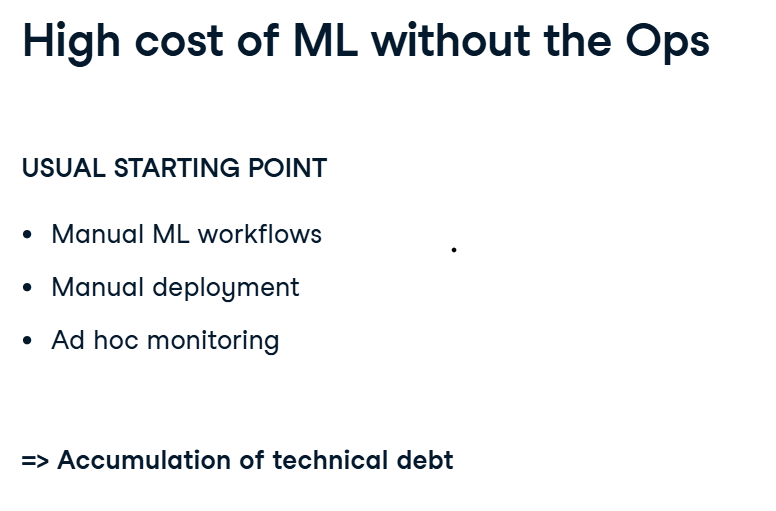

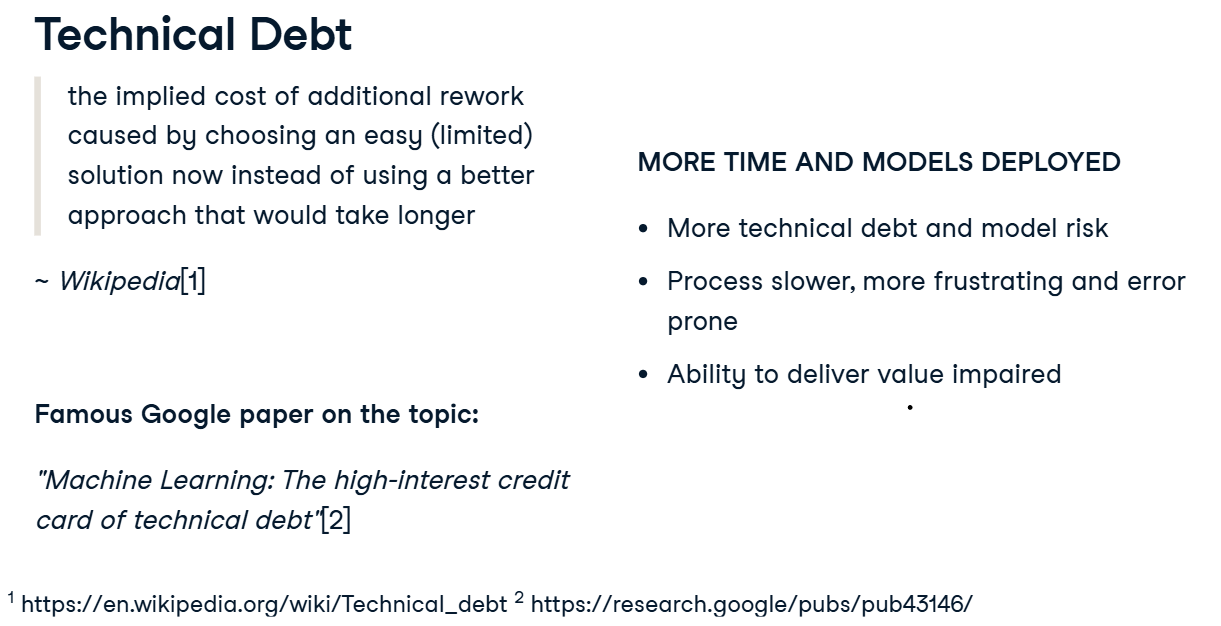

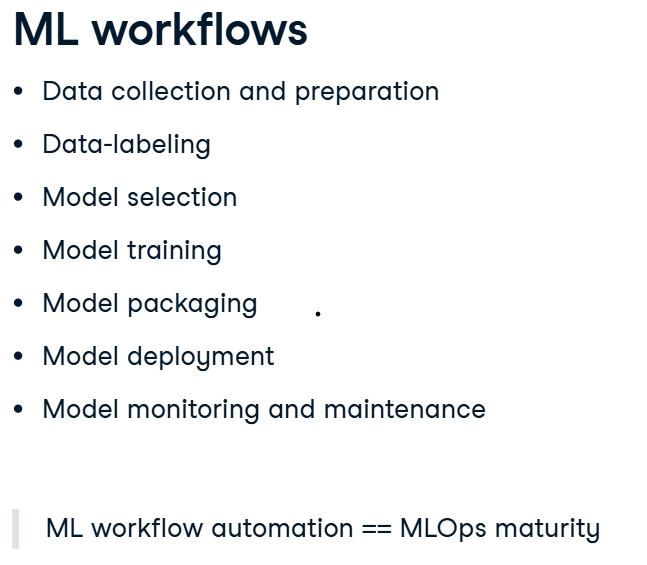

### Life Cycling stages

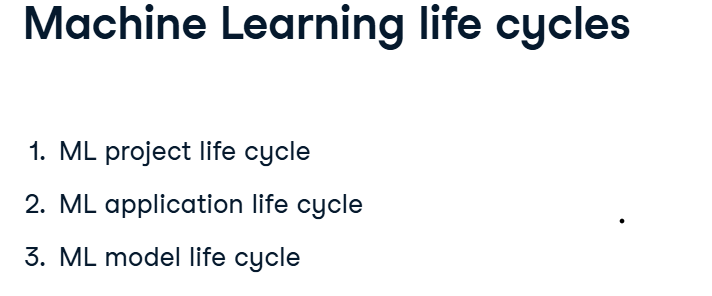

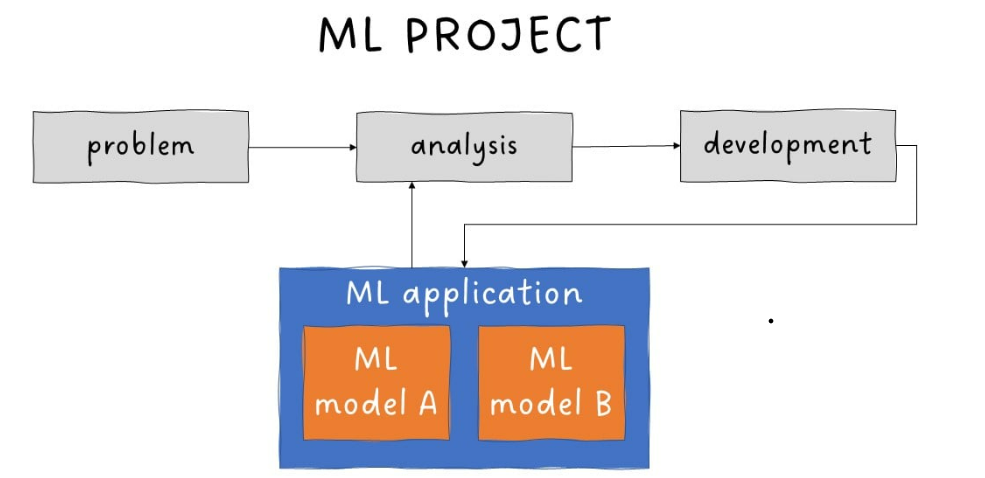

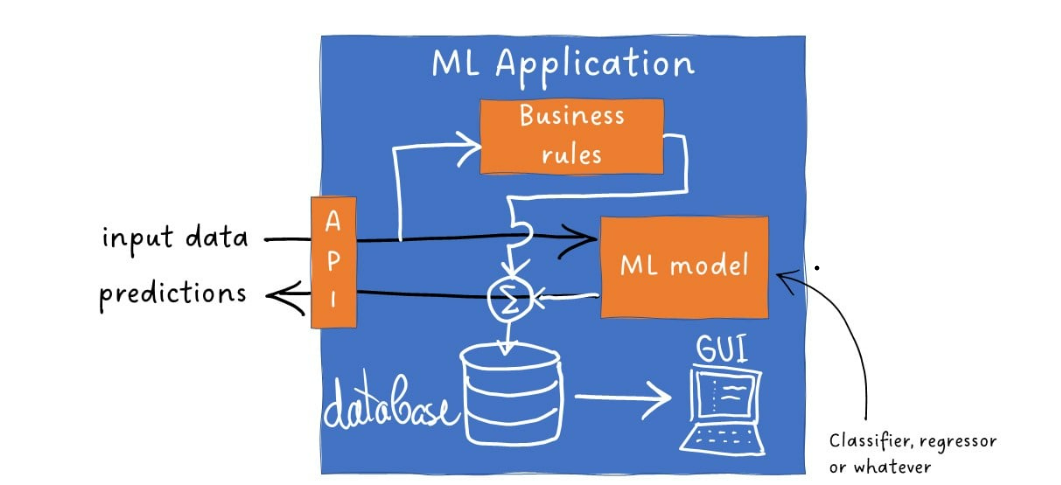

In the monolithic architectute, ML models are locked in ML application. But in microservice architecture, ML models and ML applications can be separated. This results in separate ML application lifecycle and separate ML model lifecycle. We can think of ML application as a car which has long lifespan and ML model as tires or other parts which can be changed independently with time.

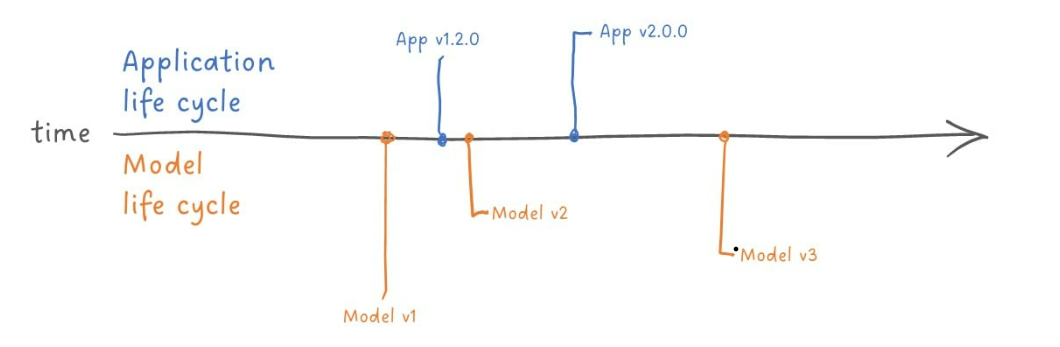

#### The removal of old model for the new model, which can be due to various reasons like discovery of better model, creation of more informative feature, process change, etc, is termed as decommisioning. The old model will be decommisioned and archived.

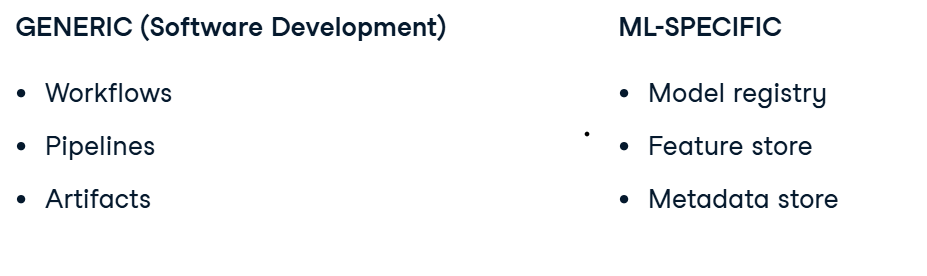

#### MLOps is a extension of the DevOps software development principles

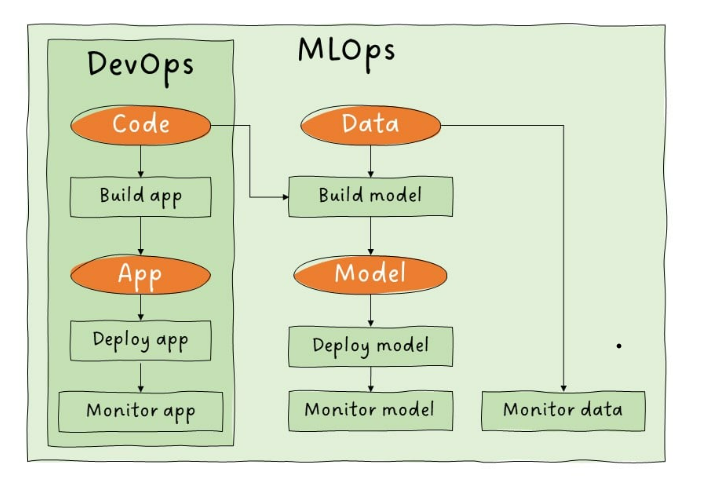

#### A workflow is a generic business term for any sequence of tasks that, starting from certain inputs, produces certain outputs. Workflows can be executed manually, automatically or semi-automatically.

#### To automate a workflow, we need to write a program, often called "a script," for every action within it. We call this program a “pipeline”.

#### The outputs of pipelines are called artifacts.

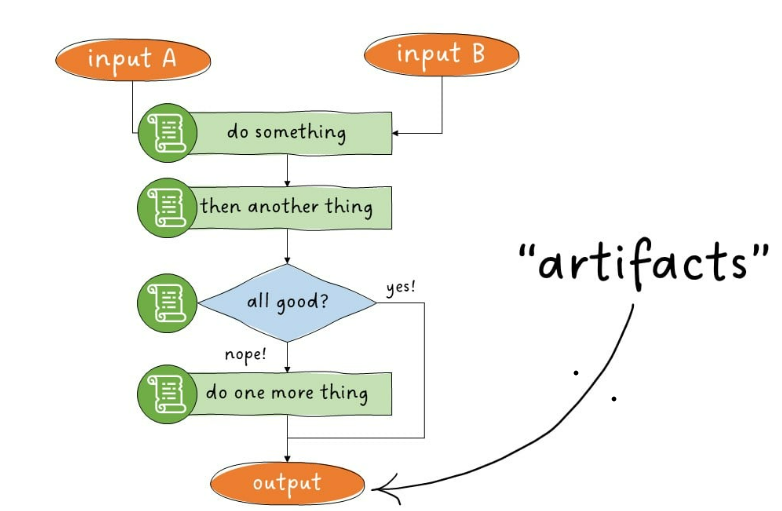


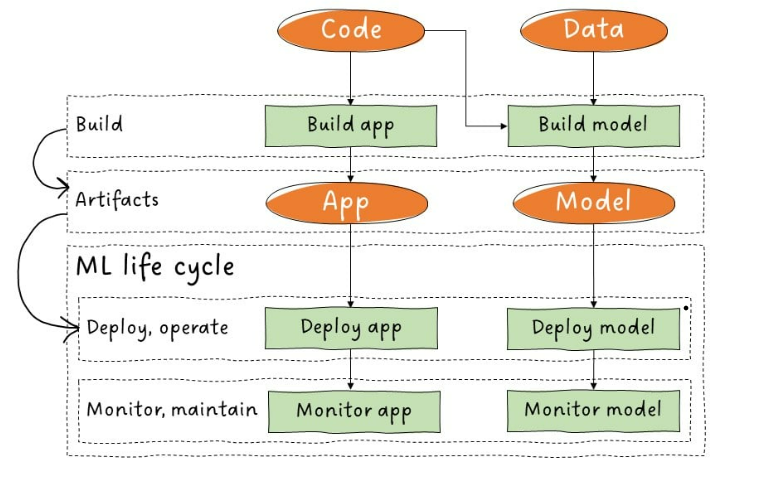

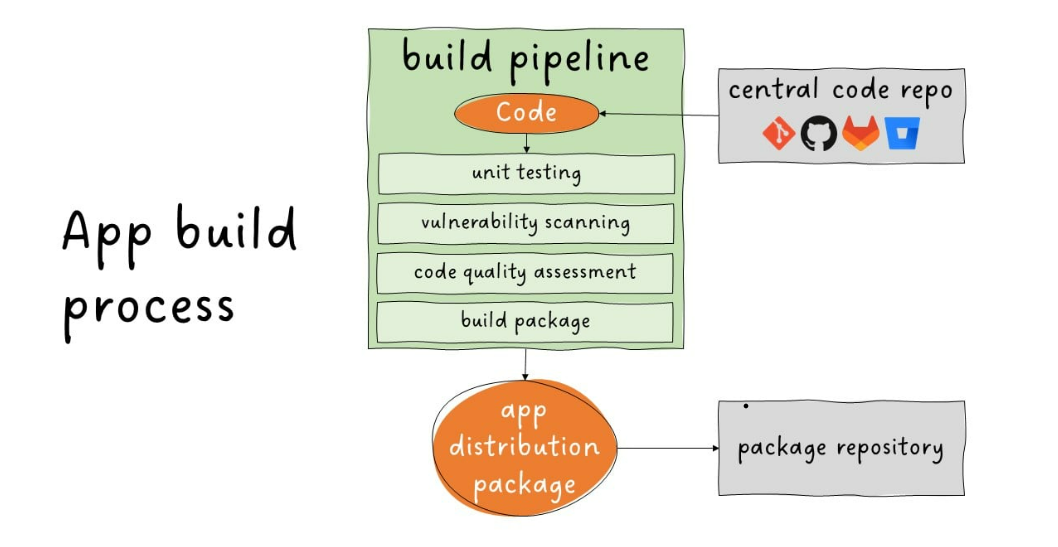

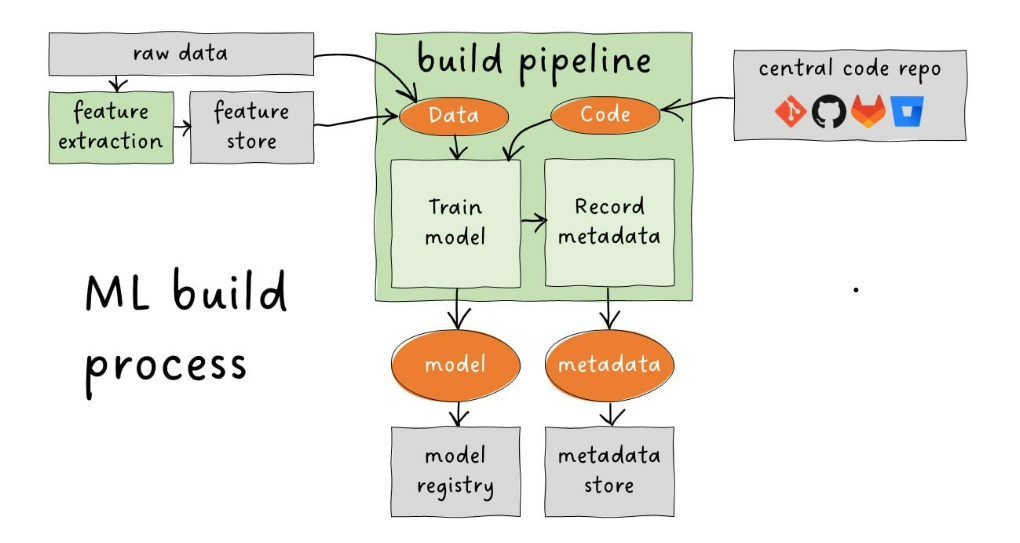

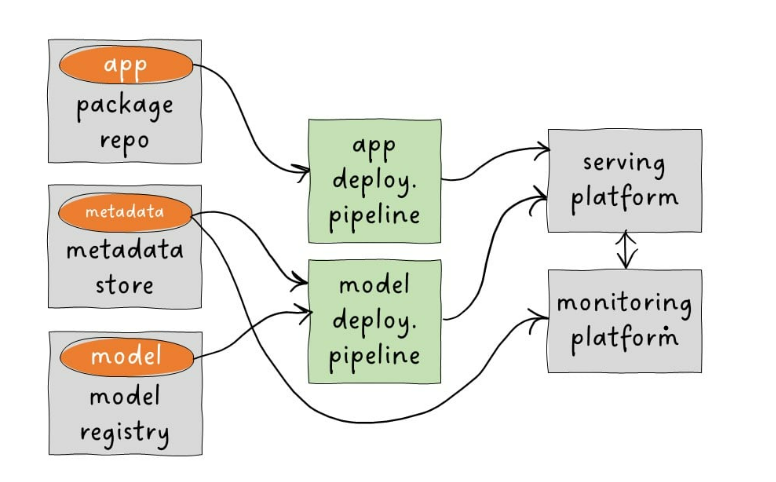

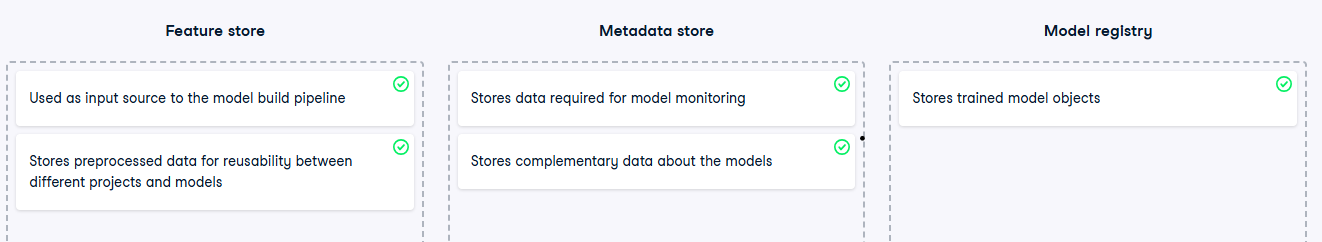


### A number of things should be considered before deploying a ML app and model

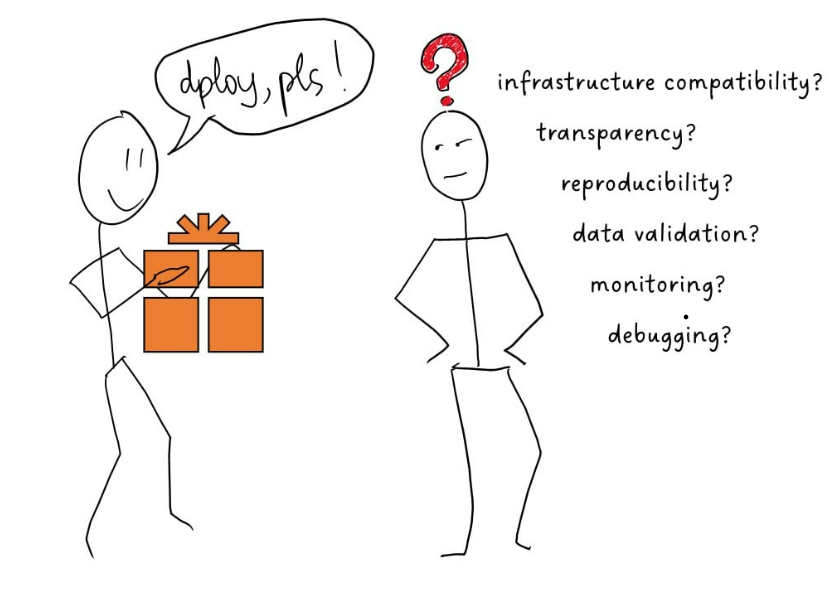

#### ✅ 1. Unit Test
What: Tests individual components or functions in isolation.

Goal: Ensure that a small piece of code (e.g., a function or method) works as expected.

Example: Testing a preprocess_data() function to confirm it handles missing values correctly.

🛠 Tools: unittest, pytest (Python)

#### 🔗 2. Integration Test
What: Tests how multiple components work together.

Goal: Verify that interfaces between modules (e.g., model + database + API) function correctly.

Example: Test if a trained model can be correctly loaded by an API and make predictions.

🛠 Tools: pytest, Postman (for APIs), Docker Compose (for services)

#### ⚡ 3. Load Test
What: Tests system performance under normal to heavy expected load.

Goal: Measure response time and behavior under expected user traffic.

Example: Send 1,000 concurrent prediction requests to an ML API to see if it meets latency requirements.

🛠 Tools: Apache JMeter, Locust, k6

#### 💥 4. Stress Test
What: Tests system behavior under extreme conditions (beyond normal load).

Goal: Determine system limits and how it fails (gracefully or not).

Example: Continuously increase the number of requests until the ML service crashes or slows drastically.

🛠 Tools: Same as load testing, but with more intense scenarios.

#### 🚀 5. Deployment Test
What: Ensures that a new release or deployment works correctly in the target environment.

Goal: Validate configurations, environment variables, and service dependencies post-deployment.

Example: Check if an ML model served through a Docker container works after being deployed to staging or production.

🛠 Tools: CI/CD pipelines (GitHub Actions, Jenkins), health check endpoints, smoke tests

### Profiling, versioning and feature stores
#### Within MLOps, data profiling refers to the automated data analysis and creation of high-level summaries, called data profiles, or expectations, which we use for validating and monitoring data in production.

        Data profiles allow us to give feedback to the user if they are providing wrong inputs and make decisions on when to retrain our model.
        To summarize, our model training pipeline should include a data profiling step, and we should store data profiles together with other model metadata in the metadata store.
        One of the most famous contemporary tools for data profiling is great_expectations and it belongs to the Python open source ecosystem.

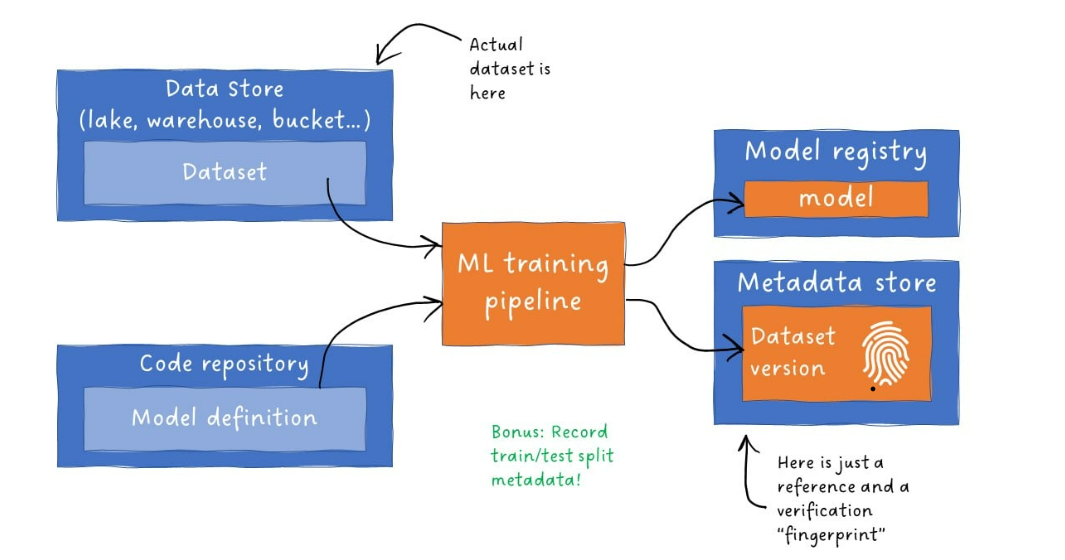

#### our training pipeline should also record the exact version of the input data we used to train our model. We call this data versioning and we need it most of all to ensure reproducibility.
        This doesn't mean we should store a copy of the full training dataset within each model deployment package. We usually leave that data in some centralized location and just record a pointer to it together with the model metadata.


#### Feature stores
        Essentially, it's a central database that stores data specifically prepared for ML training and inference which enables us to reuse features across models and projects.

#### Train-serve skew
        feature store also greatly helps to avoid the so-called training-serving skew. Training-serving skew is when our model performs significantly worse in production, than it did at training time. This will, for example, happen if we clean the input data during training, but forget to also do it production.

### Model Build Pipelines
        Note: Model pipeline and model build pipeline are not same.
        
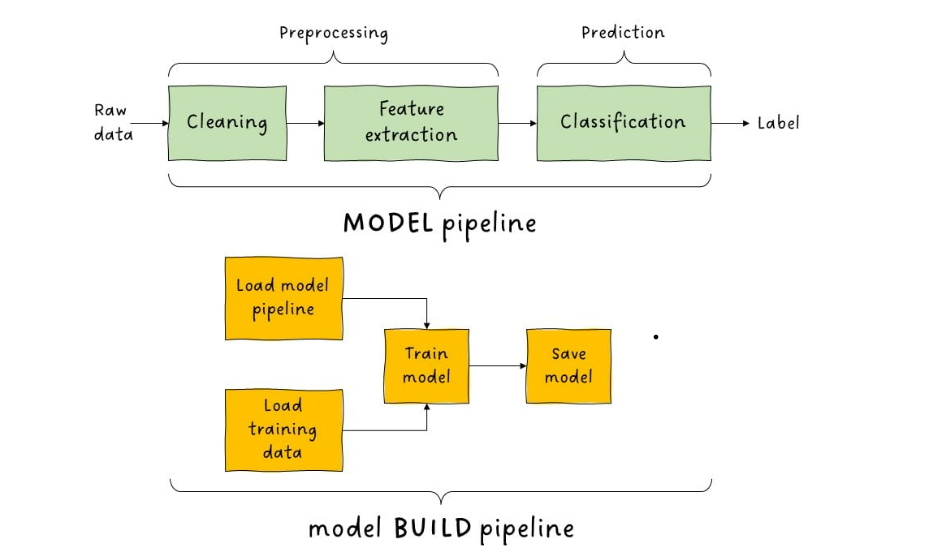

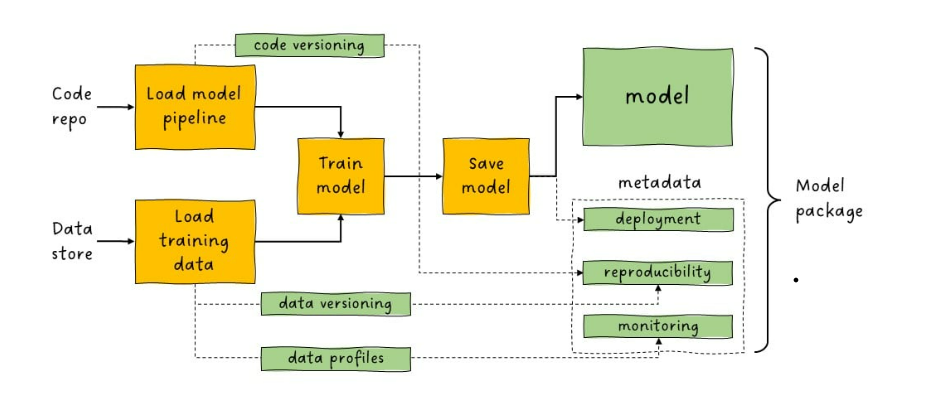

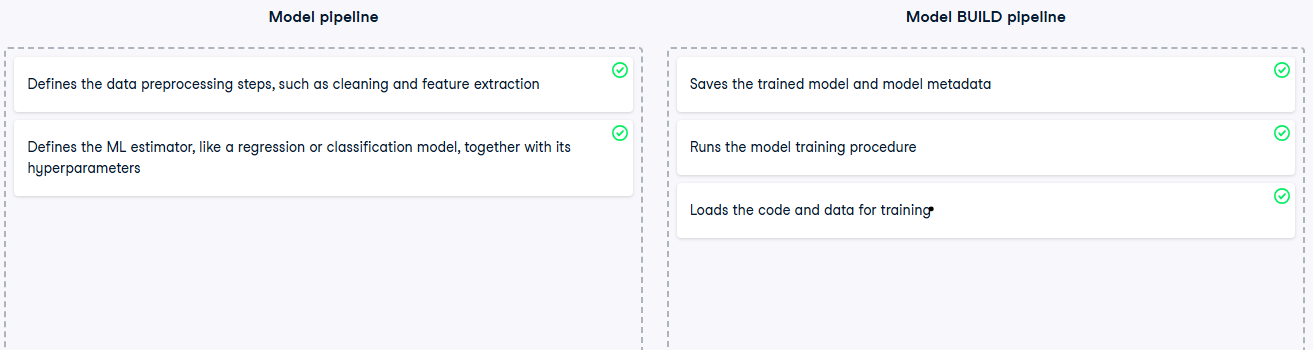

#### Model packaging marks the end of the ML development stage and our entry into Operations. This is when things get real, and, before we step into that wilderness, we need to ensure that our model package has everything we need to reach our core MLOps objectives. These are, once again:

        smooth deployment

        reproducibility

        and monitoring.

#### Model storage format options
        First, we need the trained model itself. We can save it in various formats, but ultimately, we must choose one that our model development framework can produce and our serving framework can load and run. Common examples can include PMML and pickle.

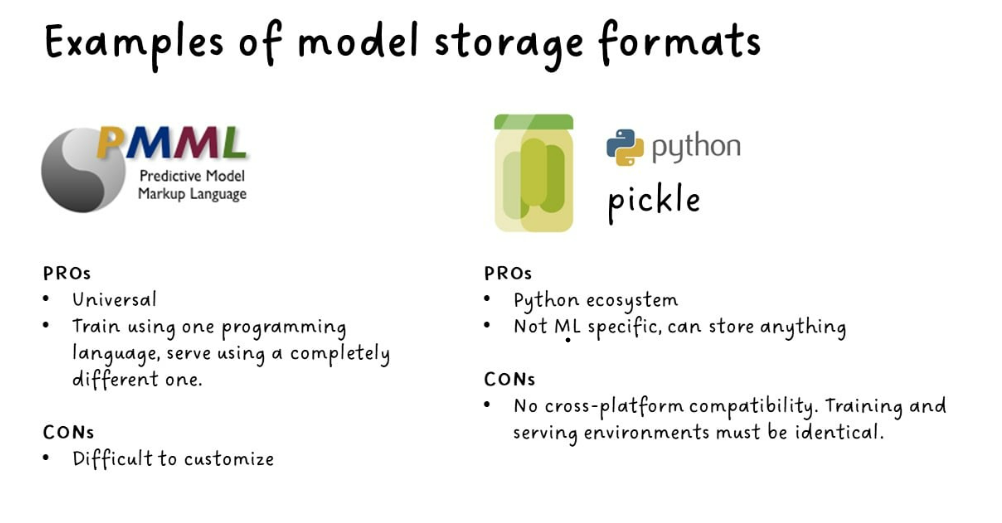

####  Reproducibility 
        a model is reproducible if we can recreate it in an automated manner at any point in time. Being able to do that proves that we control our model production process to the finest level of detail.

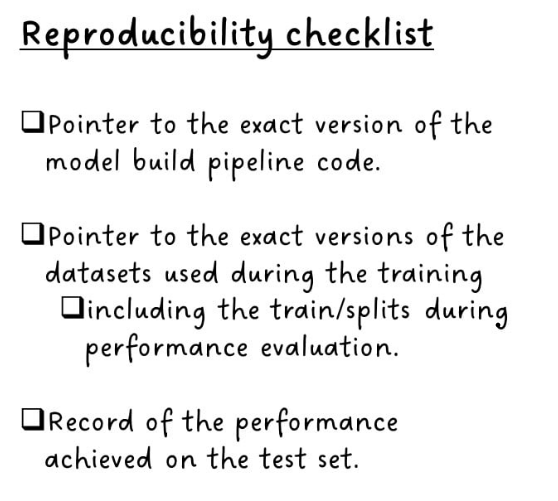

####  Monitoring
        Finally, we want to monitor our model in production. Whether it is implemented within the model-serving app or delegated to another service, the prerequisite is that data profiles, which contain our expectations about the input and output data, are saved within the model package.

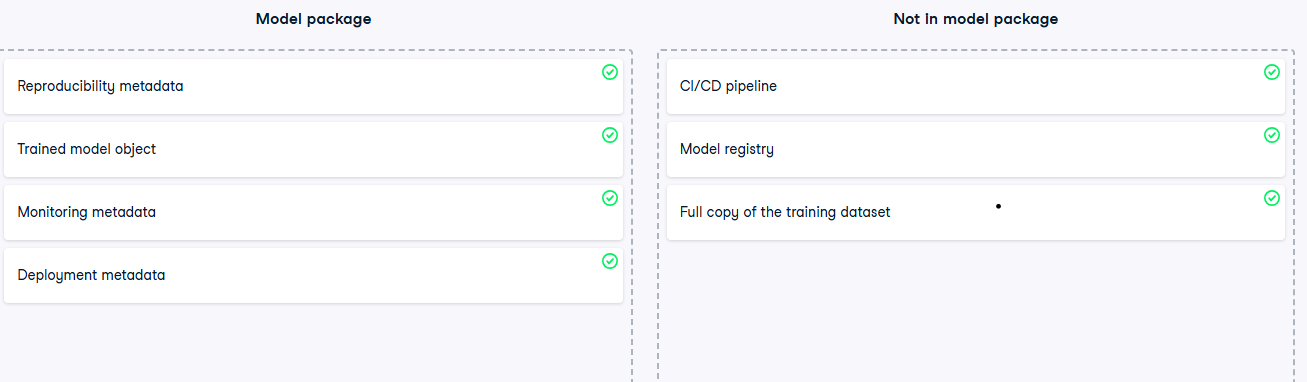

### Serving modes
This act of providing predictions as a service is called model serving. The exact way in which we then implement it is called the serving mode. 

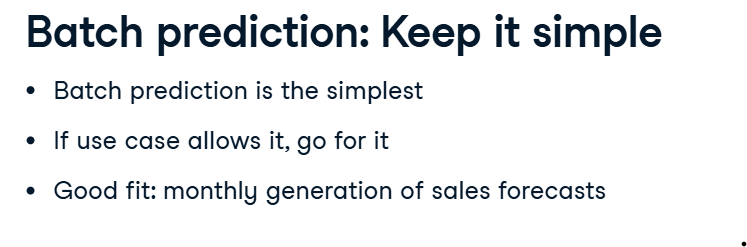

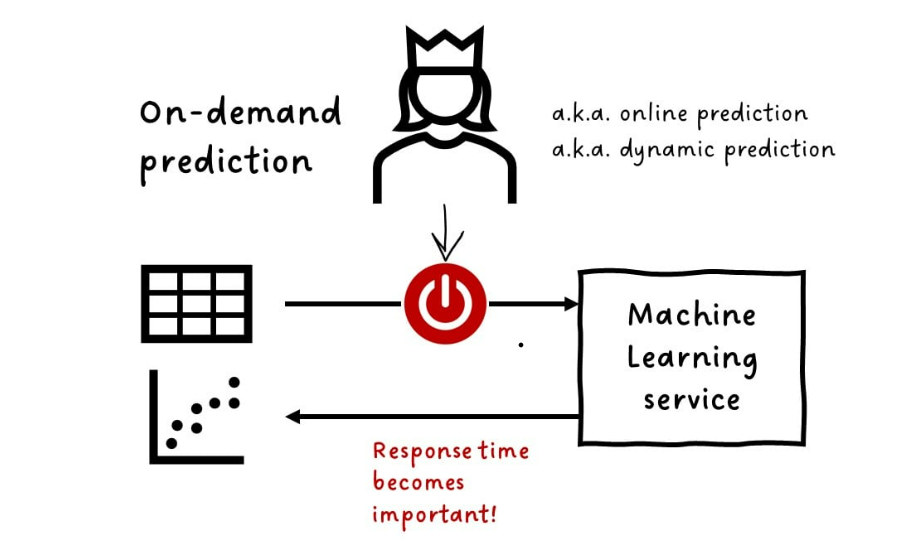

The technical term for the time passed between the user request and the service response is called latency.

#### Near-real time prediction a.k.a. Stream processing
When latency of several minutes is acceptable, we implement the so-called near-real-time prediction. This mode of serving is also called “stream processing” because the requests going into the model and predictions going out of it form so-called data streams.

#### Real-time prediction
When the predictions must be generated in less than a second, we call this real-time prediction. ML services for detecting credit card fraud require this level of performance. In such cases, a late prediction is as good as useless.

### Building the API
Where humans communicate with applications via graphical user interfaces, applications communicate with each other via APIs.

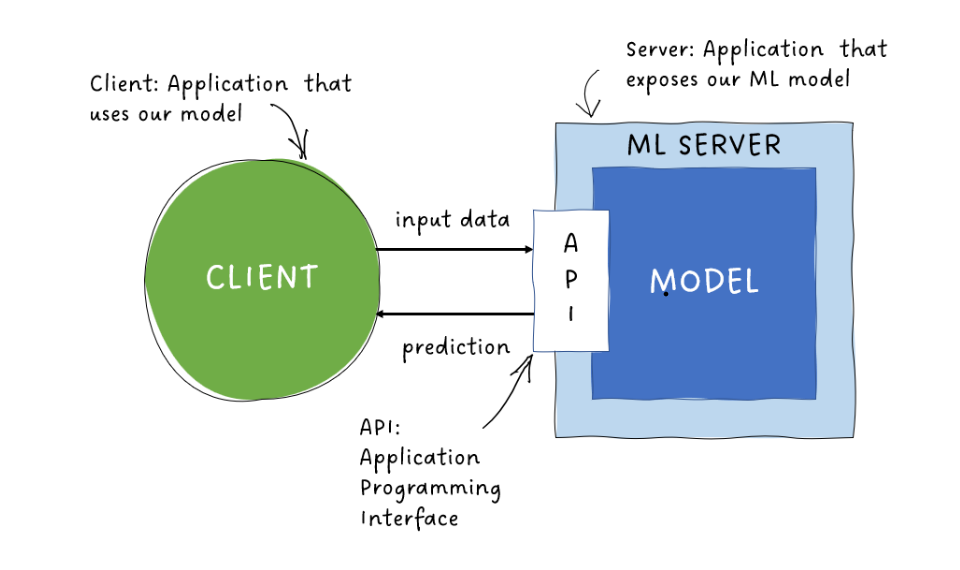

#### Some common API architectures
#### 1. REST (Representational State Transfer)
Style: Resource-based

Protocol: HTTP

Data format: JSON, XML

Key principles:  

Stateless operations

Use of standard HTTP methods (GET, POST, PUT, DELETE)

Resources identified by URIs

Pros: Simple, widely adopted

Cons: Can be inefficient for complex queries (over-fetching or under-fetching)

#### 2. GraphQL
Style: Query-based

Protocol: Usually over HTTP

Data format: JSON

Key principles:  

Clients specify exactly what data they need

Single endpoint

Pros: Avoids over/under-fetching, strong typing

Cons: More complex backend implementation; potential performance issues with deep queries

#### 3. gRPC (Google Remote Procedure Call)
Style: Contract-based (RPC)

Protocol: HTTP/2

Data format: Protocol Buffers (binary)

Key principles:  

Strongly typed service definitions via .proto files

Supports streaming

Pros: Fast, efficient for internal service communication

Cons: Less human-readable, harder for browser use without tools

#### 4. WebSockets
Style: Full-duplex communication

Protocol: WebSocket (persistent connection)

Use case: Real-time applications (chat, games, live data)

Pros: Bi-directional, low-latency

Cons: Complex state management, not RESTful

#### 5. SOAP (Simple Object Access Protocol)
Style: Protocol-based

Protocol: HTTP, SMTP, others

Data format: XML

Key principles:  

Strict standards and contracts (WSDL)

Pros: Strong security (WS-Security), good for enterprise needs

Cons: Verbose, complex, less flexible than REST

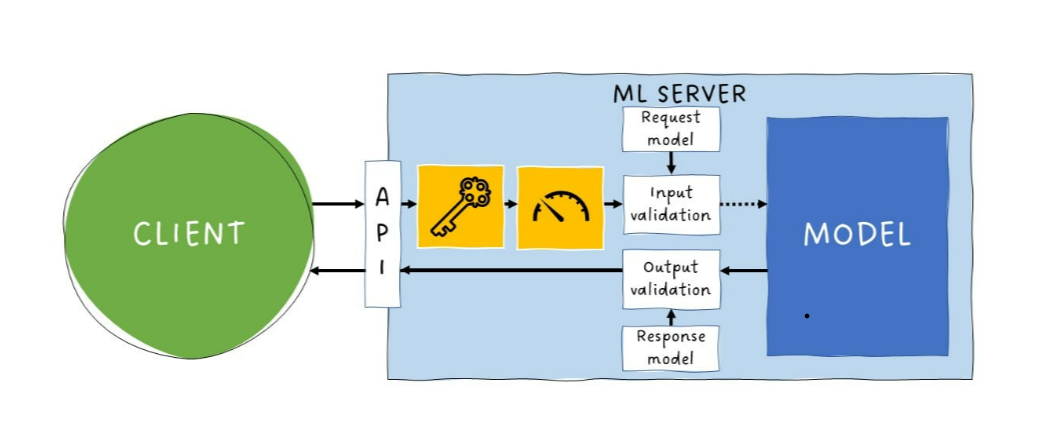

In the simplest form our API would accept whatever the client provides as velocity and distance run that through the model  and return the estimated time of arrival back to the client.

If a client makes an invalid request - for example, by providing a non-numeric value for velocity our server would not be able to handle it and would return a so-called Internal Server Error, which would make us look bad.

##### Input validation
For this reason, it is standard practice to implement input data validation. In its simplest form, that means checking if the request contains all required input attributes and do their values have expected types.

In our example, we expect the field's velocity and distance, which should both be positive real numbers.

We call this the request model, and it must be included in the API documentation provided to the users.

##### Output validation
Similarly, we don't want to return any data our model produces blindly.
A bug in the code could suddenly result in the model returning the estimated time of arrival as a negative number.
This could crash our client's application and damage our reputation.
We should therefore implement a reference specification of output values, called the response model.
That will allow us to validate all outputs before sending them to the client and generate informative error messages when needed.

##### Authentication
Lastly, we want to allow only specific clients to use our API.
For this we need an authentication layer even before our input validation. And even for authorized users, we want to control the number of requests they can make per unit of time.
This is called API throttling.

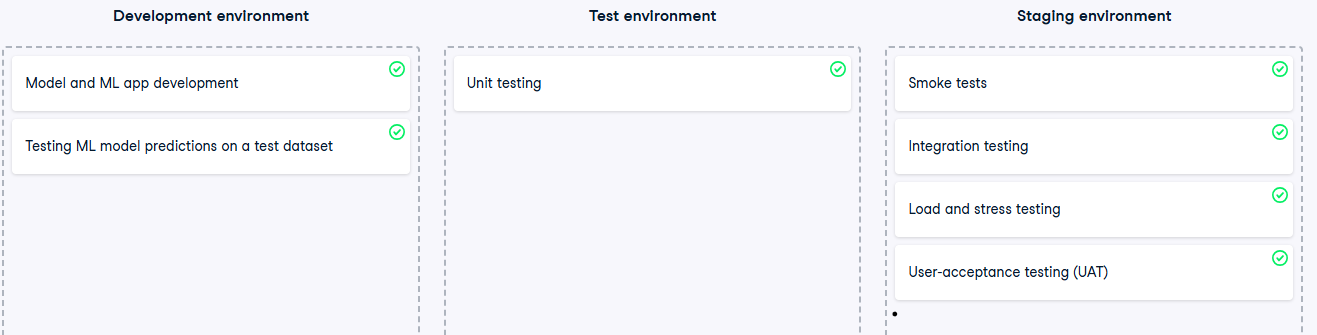

### Model Deployment Strategies
Some of the fundamental deployment strategies are:  

#### 1. Blue/green deployment

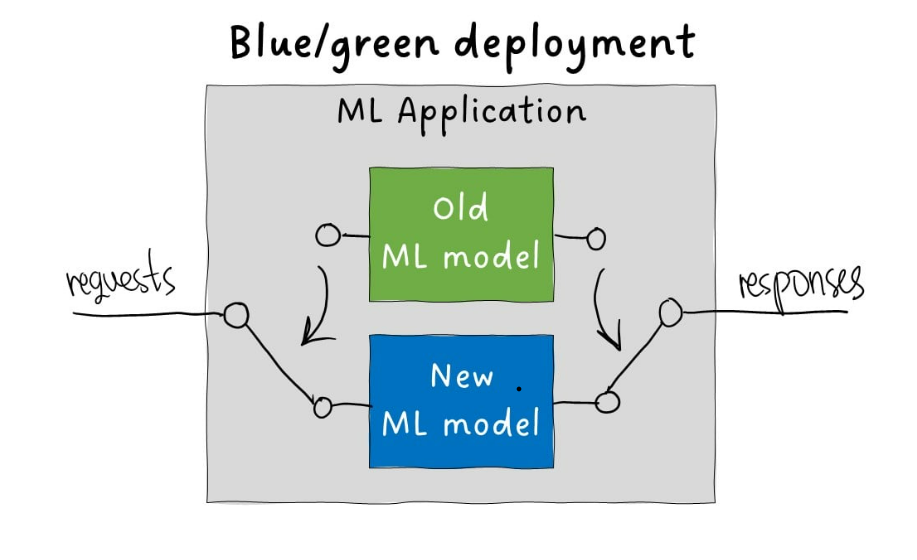

With a decoupled approach, the ML app can load the new model while serving the old one without interruptions. Then at the click of a button, it can redirect the incoming requests toward the new model, ignoring the old one completely.

This instantaneous switching from one model to another in production is called the blue/green deployment strategy. The colors represent the models between which we are switching.

The advantage of this approach is obvious simplicity. The disadvantage is that we suddenly serve the new model to all our users. If that model starts crashing or returns weird predictions, all our users will suffer.

The good news is that, just as we could rapidly switch to the new model, we can also roll back to the old one and keep running it until we resolve the issue.


#### 2. Canary deployment

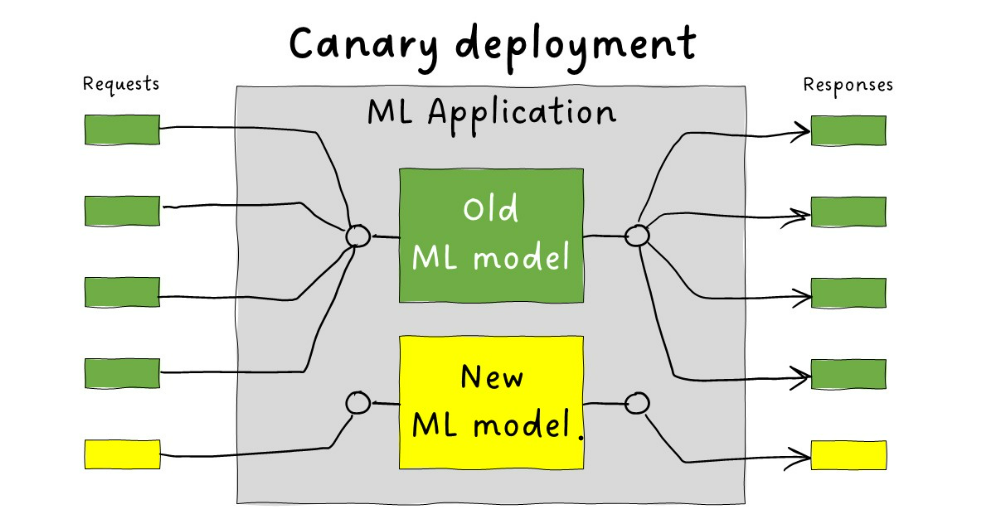

Still, we could consider the so-called canary deployment for a less risky deployment strategy. The canary deployment also involves the old and the new model, but it has several steps.

First, we start redirecting a small percentage of the requests to the new model.

If all works well, we will increase the percentage of traffic toward the new model by a notch. We can repeat this several times until we are confident all relevant client requests have been successfully handled.

We then start directing the entire traffic to the new model.

#### 2. Shadow deployment
Lastly, we have the “shadow deployment”. This is when we send user requests to both models in parallel, but the user gets only the responses of the old model while the new model’s outputs are saved for validation.

This deployment strategy is the safest, but if executed in real-time, it might affect our performance because we now have two model executions for each request.

We could reduce this excess load by running the shadow model on only a small percentage of requests or in a scheduled batch mode outside peak service hours.

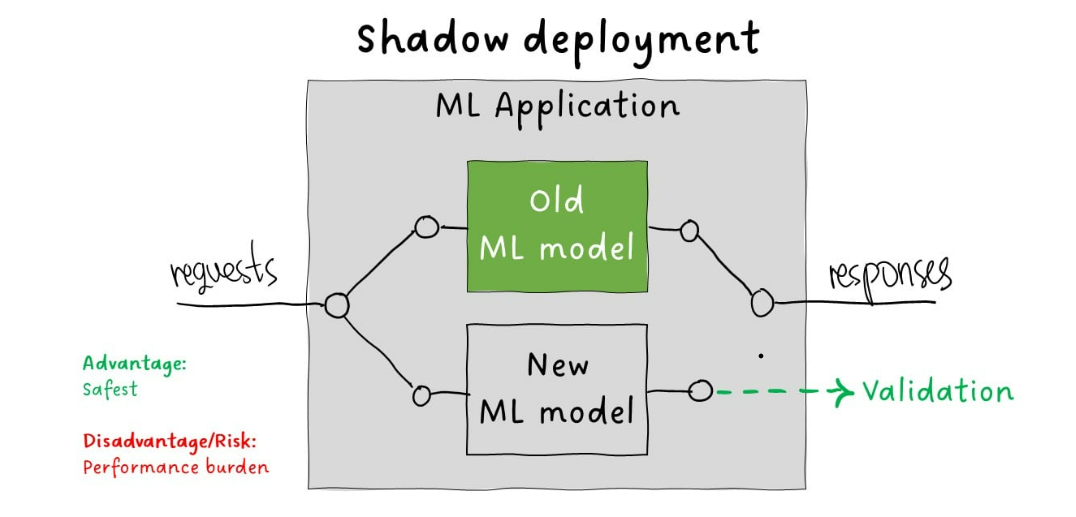

### Monitoring ML Services

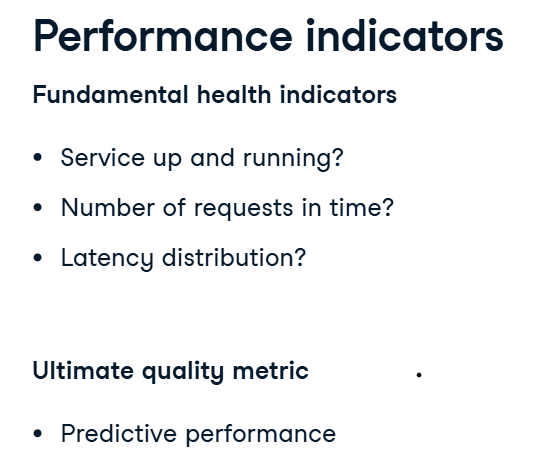

#### conceptual drift
As the real world is constantly changing the properties of the classes can soon change so that the actual boundary moves elsewhere in the feature space.

We call this "concept drift" and define it as any "significant change in the actual relationship between the input and output features". As our model keeps making predictions based on the old boundary, it will make more and more incorrect predictions.

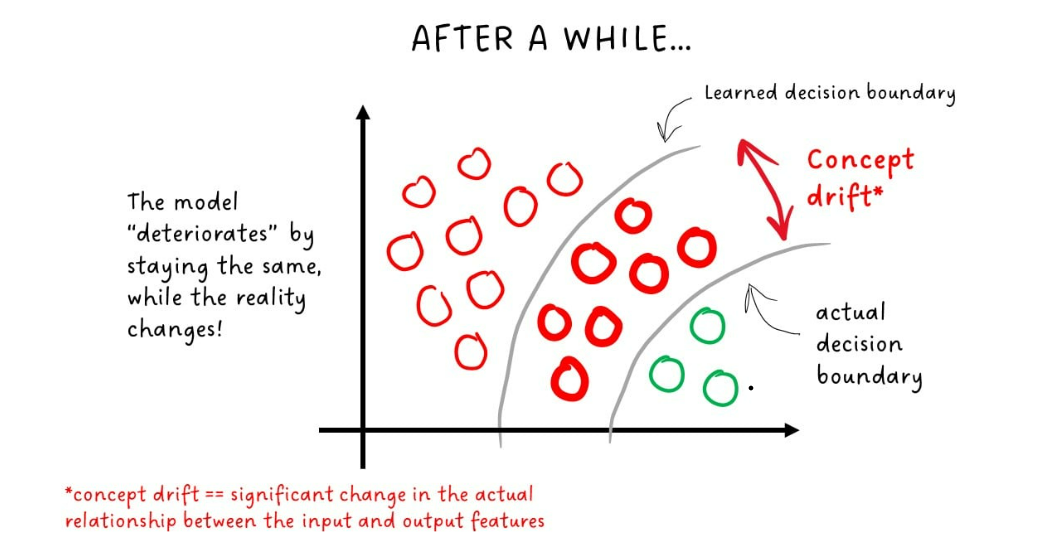

#### Covariate shift
We can work with what we have and monitor the input features. If we notice that the relationships between the inputs have changed since the model was trained we call this the "covariate shift", because features are also called "covariates" in statistical jargon. In practice, covariate shift is a good indicator of concept drift but it is not perfect.

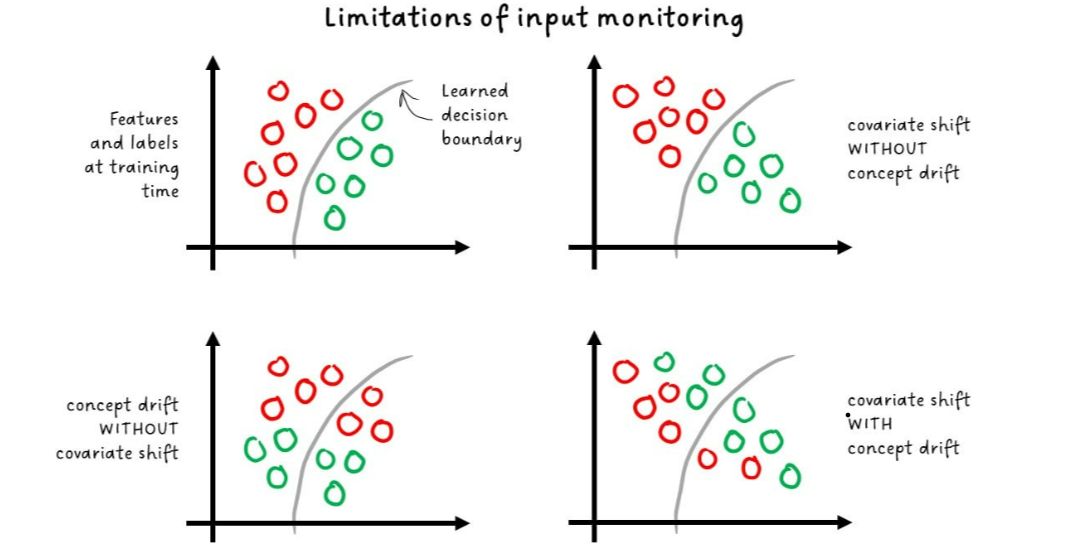

### possible internal cause of errors in ML service

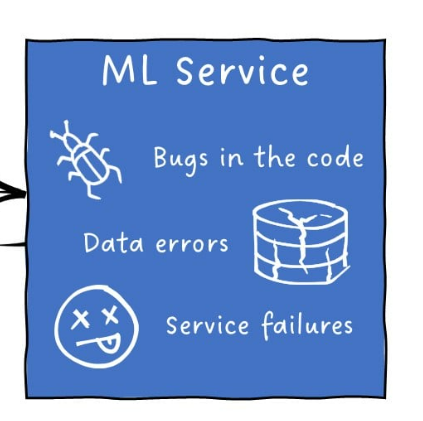

For mitigating these problems, we need a good monitoring and alerting system. Something that can tell us what is wrong or at least where to look for. One way of achieving this is through logging.

Another important component can be monitoring of data pipeline for data validation.

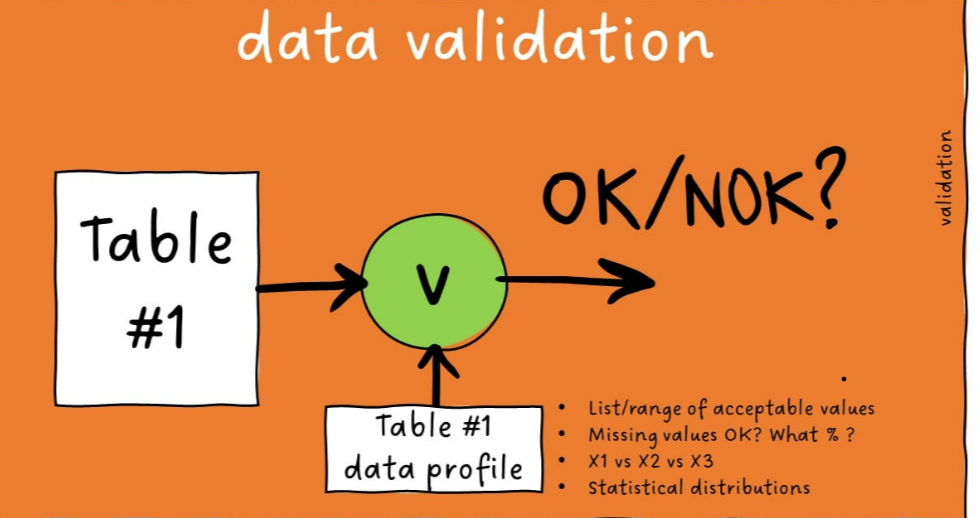

Another can be Statistical validation.

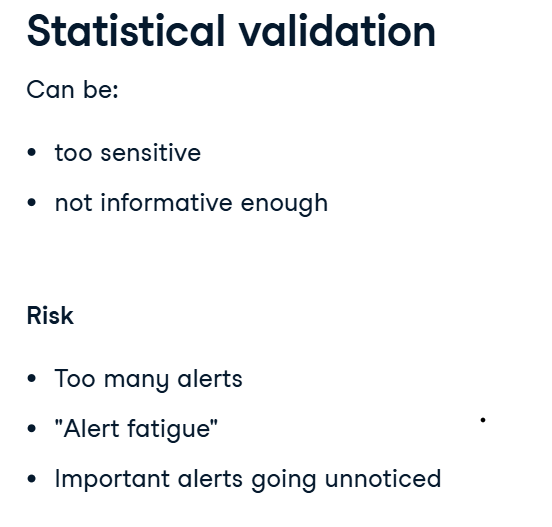


For maximum robustness and reusability, the monitoring system should be an independent, centralized service, running on a dedicated infrastructure. That way we can monitor all separate ML services in one place and guarantee our users the highest possible standard of service quality.

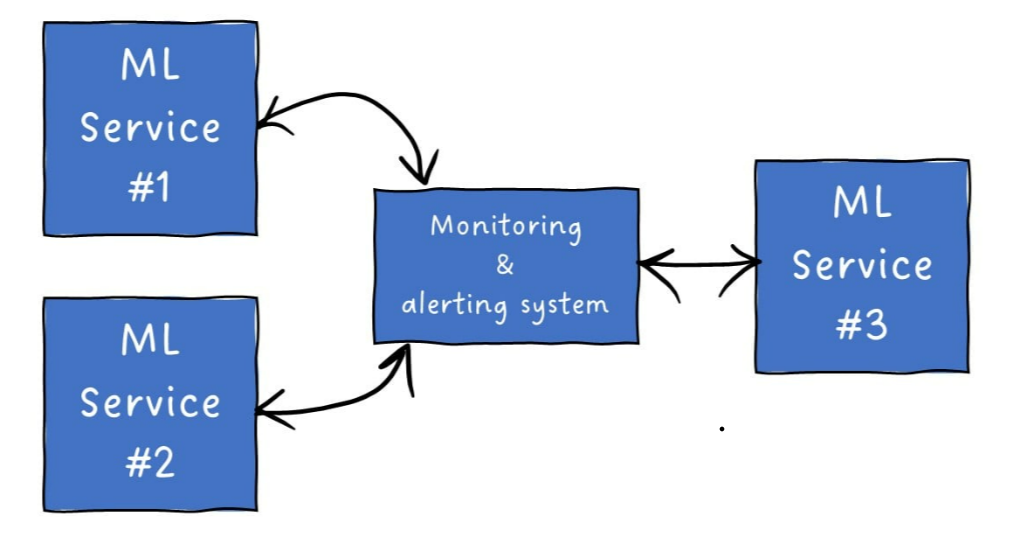

### Model maintenance
We cannot possibly address each failure in detail, so we focus more on our core object of interest i.e. ML model.

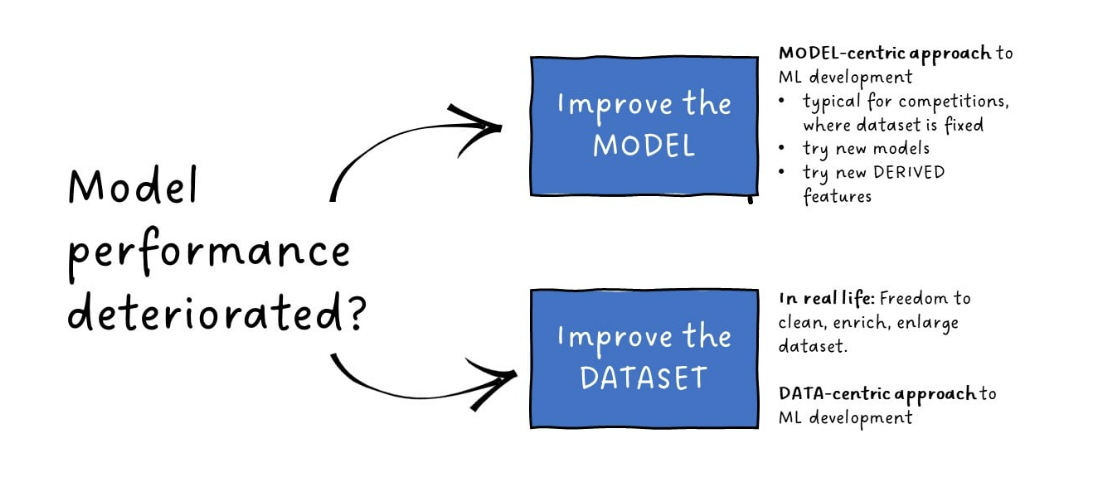

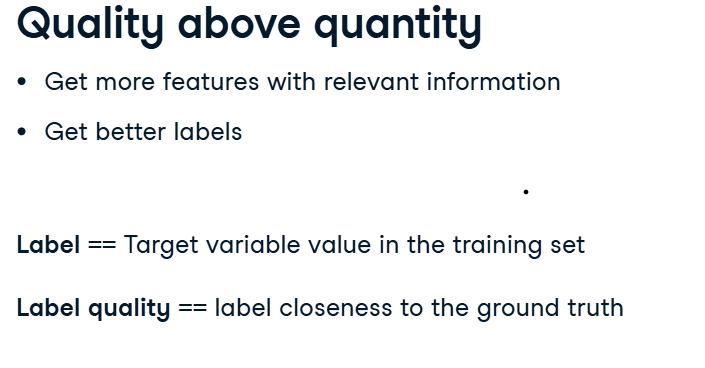

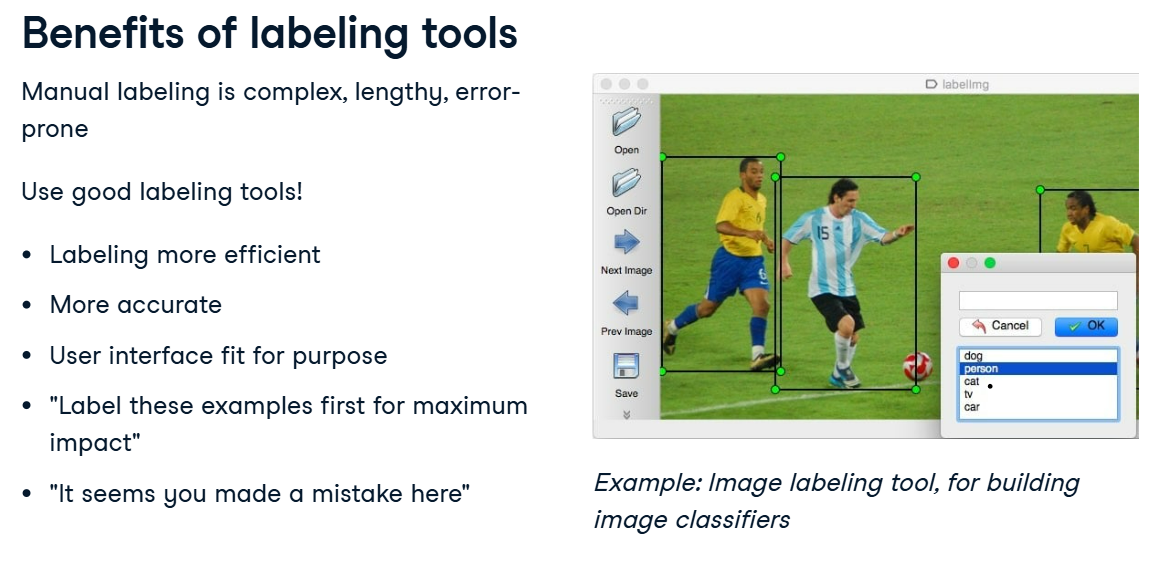



### Model Governance

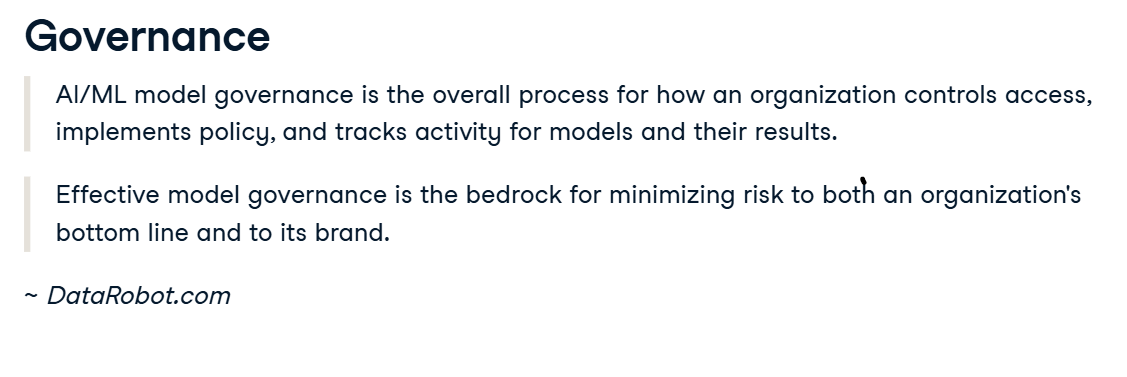

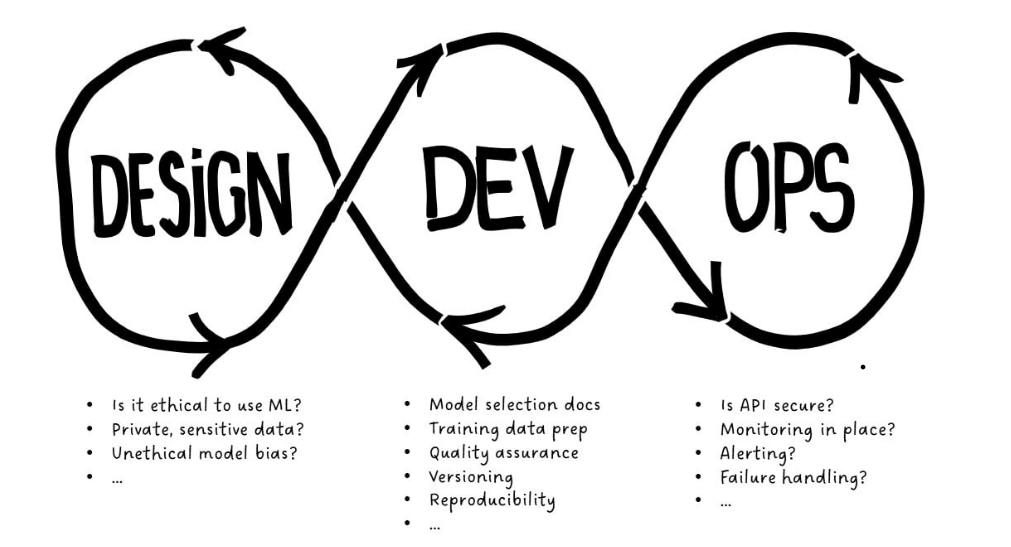

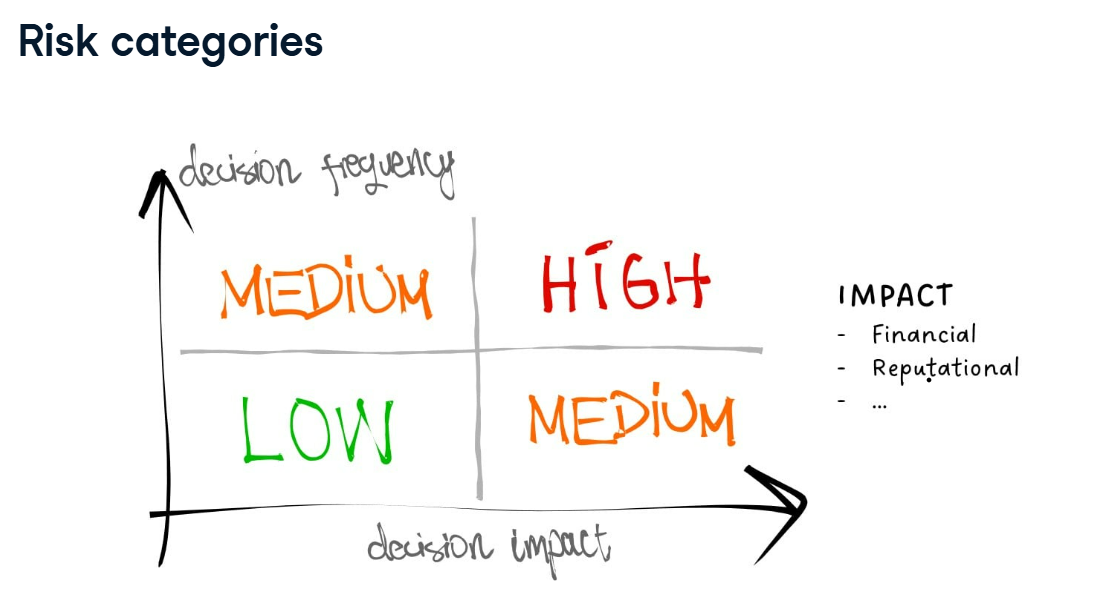

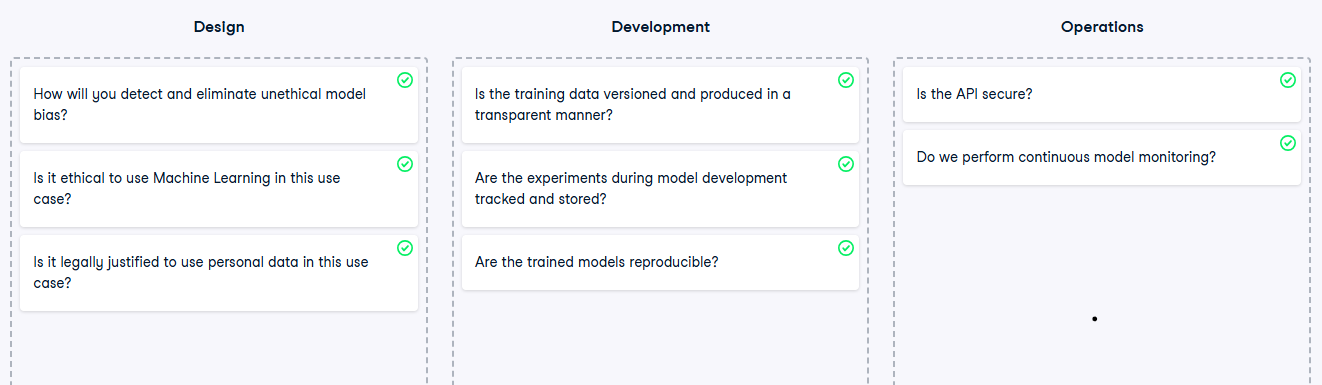

